In [1]:
import sympy
import sympy.simplify

from sympy import Integral, integrate, solve, solveset, roots, real_roots, Poly, QQ, ZZ

sympy.init_printing()
sympy.init_session()

IPython console for SymPy 1.13.2 (Python 3.11.10-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



In [2]:
T = sympy.Symbol('T', real=True)
DT = sympy.Symbol('\Delta T', real=True)
S = sympy.Symbol('S_r', real=True)

DM = sympy.Symbol('\Delta M', real=True)

G = sympy.Symbol('G_{max}', real=True)

L = sympy.Symbol('L', real=True)

In [3]:
t = sympy.Symbol('t', real=True)


interm1 = integrate(-S*t*t, (t, 0, DT))

interm2 = integrate(-S*DT*(t+DT), (t, 0, T))

interm3 = integrate(S*(t-DT)*(t + T + DT), (t, 0, 2*DT))

interm4 = integrate(S*DT*(t + T + 3*DT), (t, 0, T))

interm5 = integrate((S*(DT - t)*(t + 2*T + 3*DT)), (t, 0, DT))


sum_tot = interm1 + interm2 + interm3 + interm4 + interm5

sum_tot = sympy.simplify(sympy.expand(sum_tot))
sum_tot


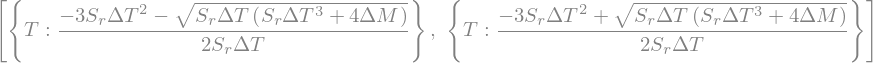

In [4]:
# Reaches Max Gradient
soldict = solve([sum_tot - DM, DT - G / S], T, dict=True)
soldict = [{k: sympy.simplify(v) for k, v in sdict.items()} for sdict in soldict]
soldict

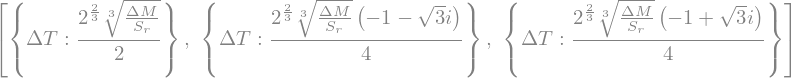

In [5]:
# Never reaches max gradient
soldict = solve([DM - sympy.simplify(sympy.Subs(sum_tot, T, 0)), T], DT, dict=True)

solexpr = (DM - sympy.simplify(sympy.Subs(sum_tot, T, 0)))
solve([solexpr], DT, dict=True)
soldict = [{k: sympy.simplify(v) for k, v in sdict.items()} for sdict in soldict]
soldict

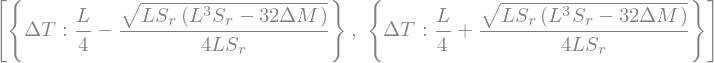

In [6]:
# Solves for T and DT given total length of L = 2*T + 4*DT

DT_expr = sympy.simplify(sympy.Subs(sum_tot, T, (L - 4*DT)/2))
DT_dict = solve([DM - DT_expr], DT, dict=True)
DT_dict


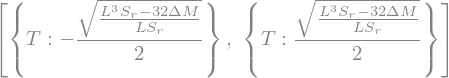

In [7]:
# Solves for T and DT given total length of L = 2*T + 4*DT
T_expr =  sympy.simplify(sympy.Subs(sum_tot, DT, (L - 2*T)/4))
T_dict = solve([DM - T_expr], T, dict=True)
T_dict

In [8]:
from sympy.codegen.ast import Assignment
from sympy.printing.pycode import PythonCodePrinter
from sympy import pycode

DMpy = sympy.Symbol('DM')
DTpy = sympy.Symbol('DT')
Tpy = sympy.Symbol('T')

pyexpr_DT = sympy.simplify(sympy.Subs(DT_dict[-1][DT], DM, DMpy))

commons, expr = sympy.cse(pyexpr_DT)
for common in commons:
    print(pycode(Assignment(*common)))
print(pycode(Assignment(DTpy, expr[0])))

print('')

pyexpr_T =  sympy.simplify(
                sympy.Subs(
                    sympy.Subs(T_dict[-1][T], DM, DMpy),
                    DT, DTpy
                )
            )

commons, expr = sympy.cse(pyexpr_T)
for common in commons:
    print(pycode(Assignment(*common)))
print(pycode(Assignment(Tpy, expr[0])))



DT = (1/4)*(L**2*S_r + math.sqrt(L*S_r*(-32*DM + L**3*S_r)))/(L*S_r)

T = (1/2)*math.sqrt(-32*DM/(L*S_r) + L**2)
